<a href="https://colab.research.google.com/github/MohsenLotfii/School_electricity/blob/main/1_Schools_electricity_(1st_week_of_Feb_2023_24)__28_Oct_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


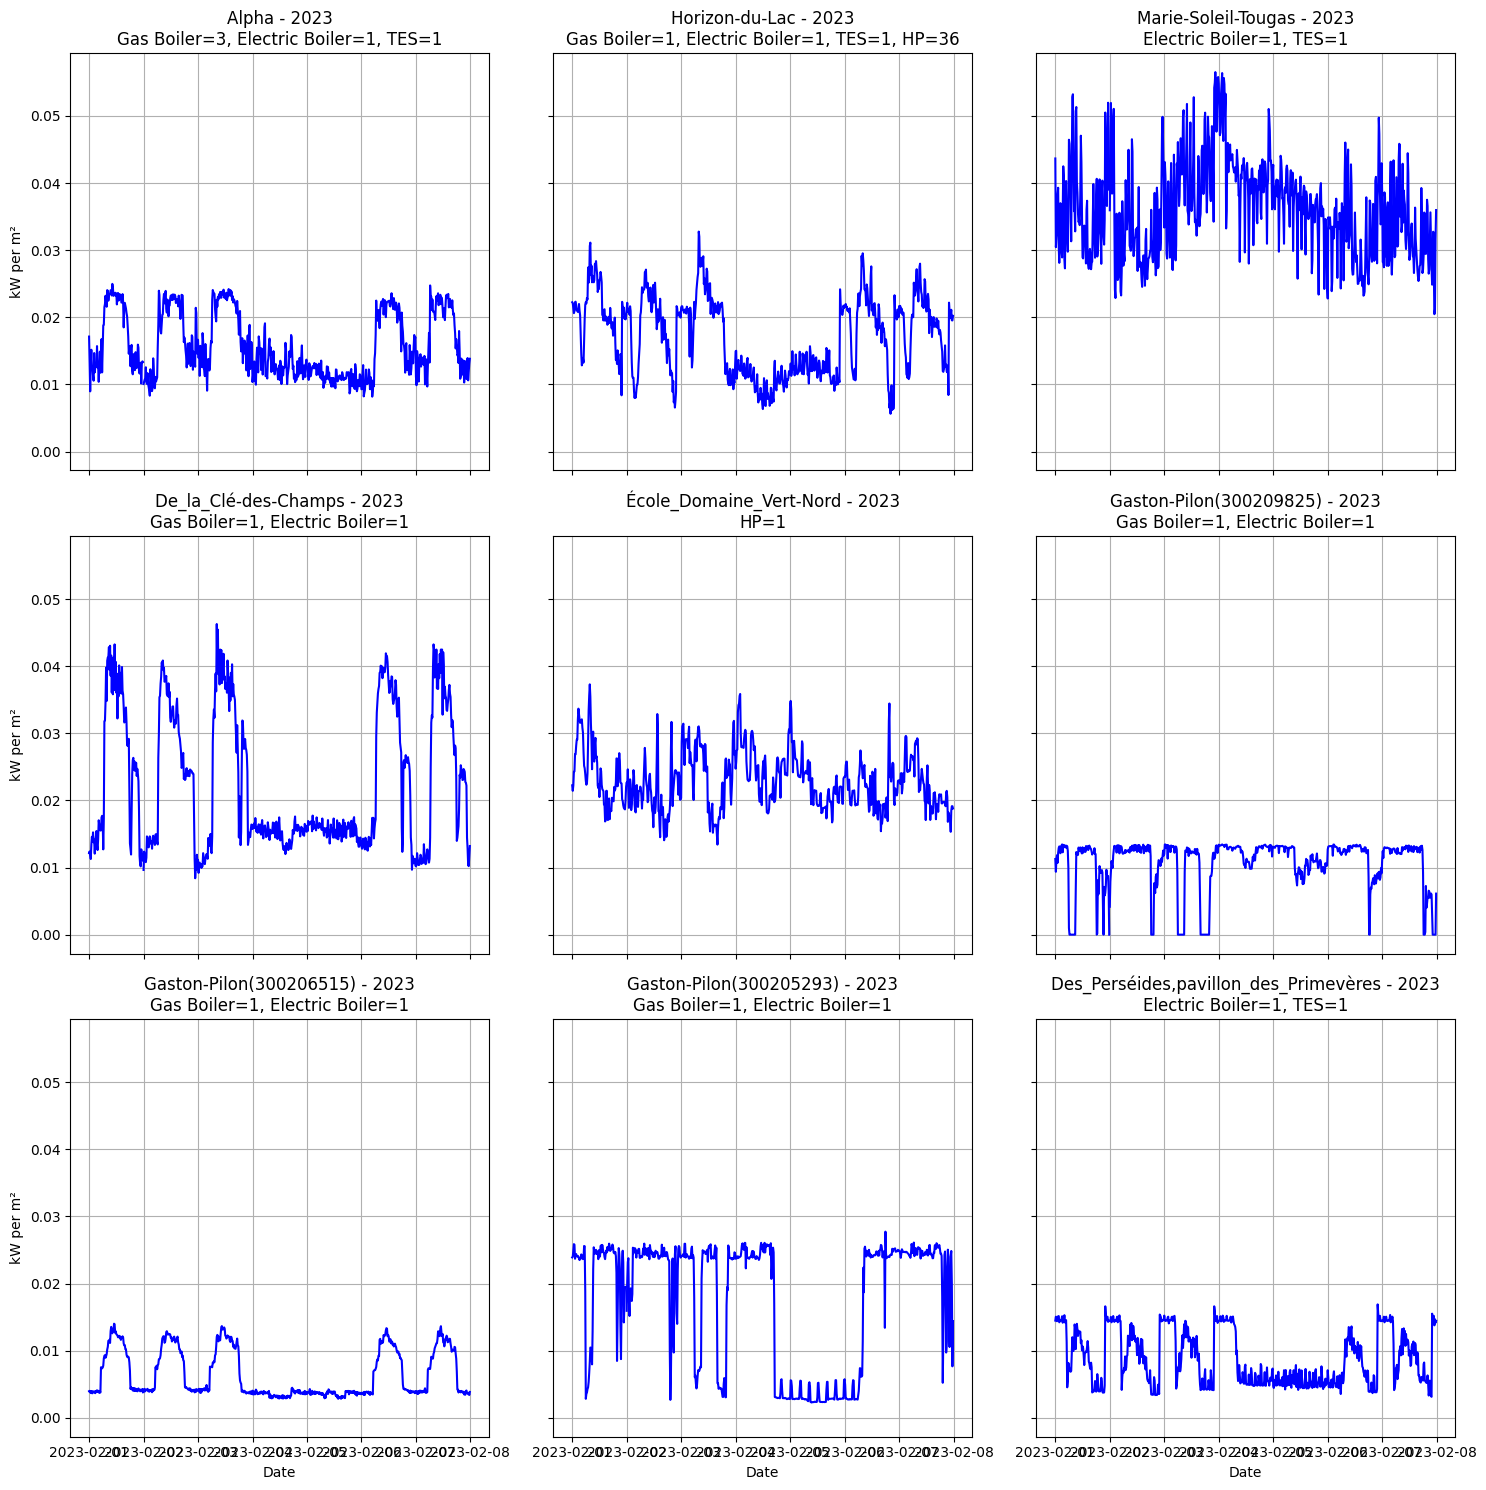

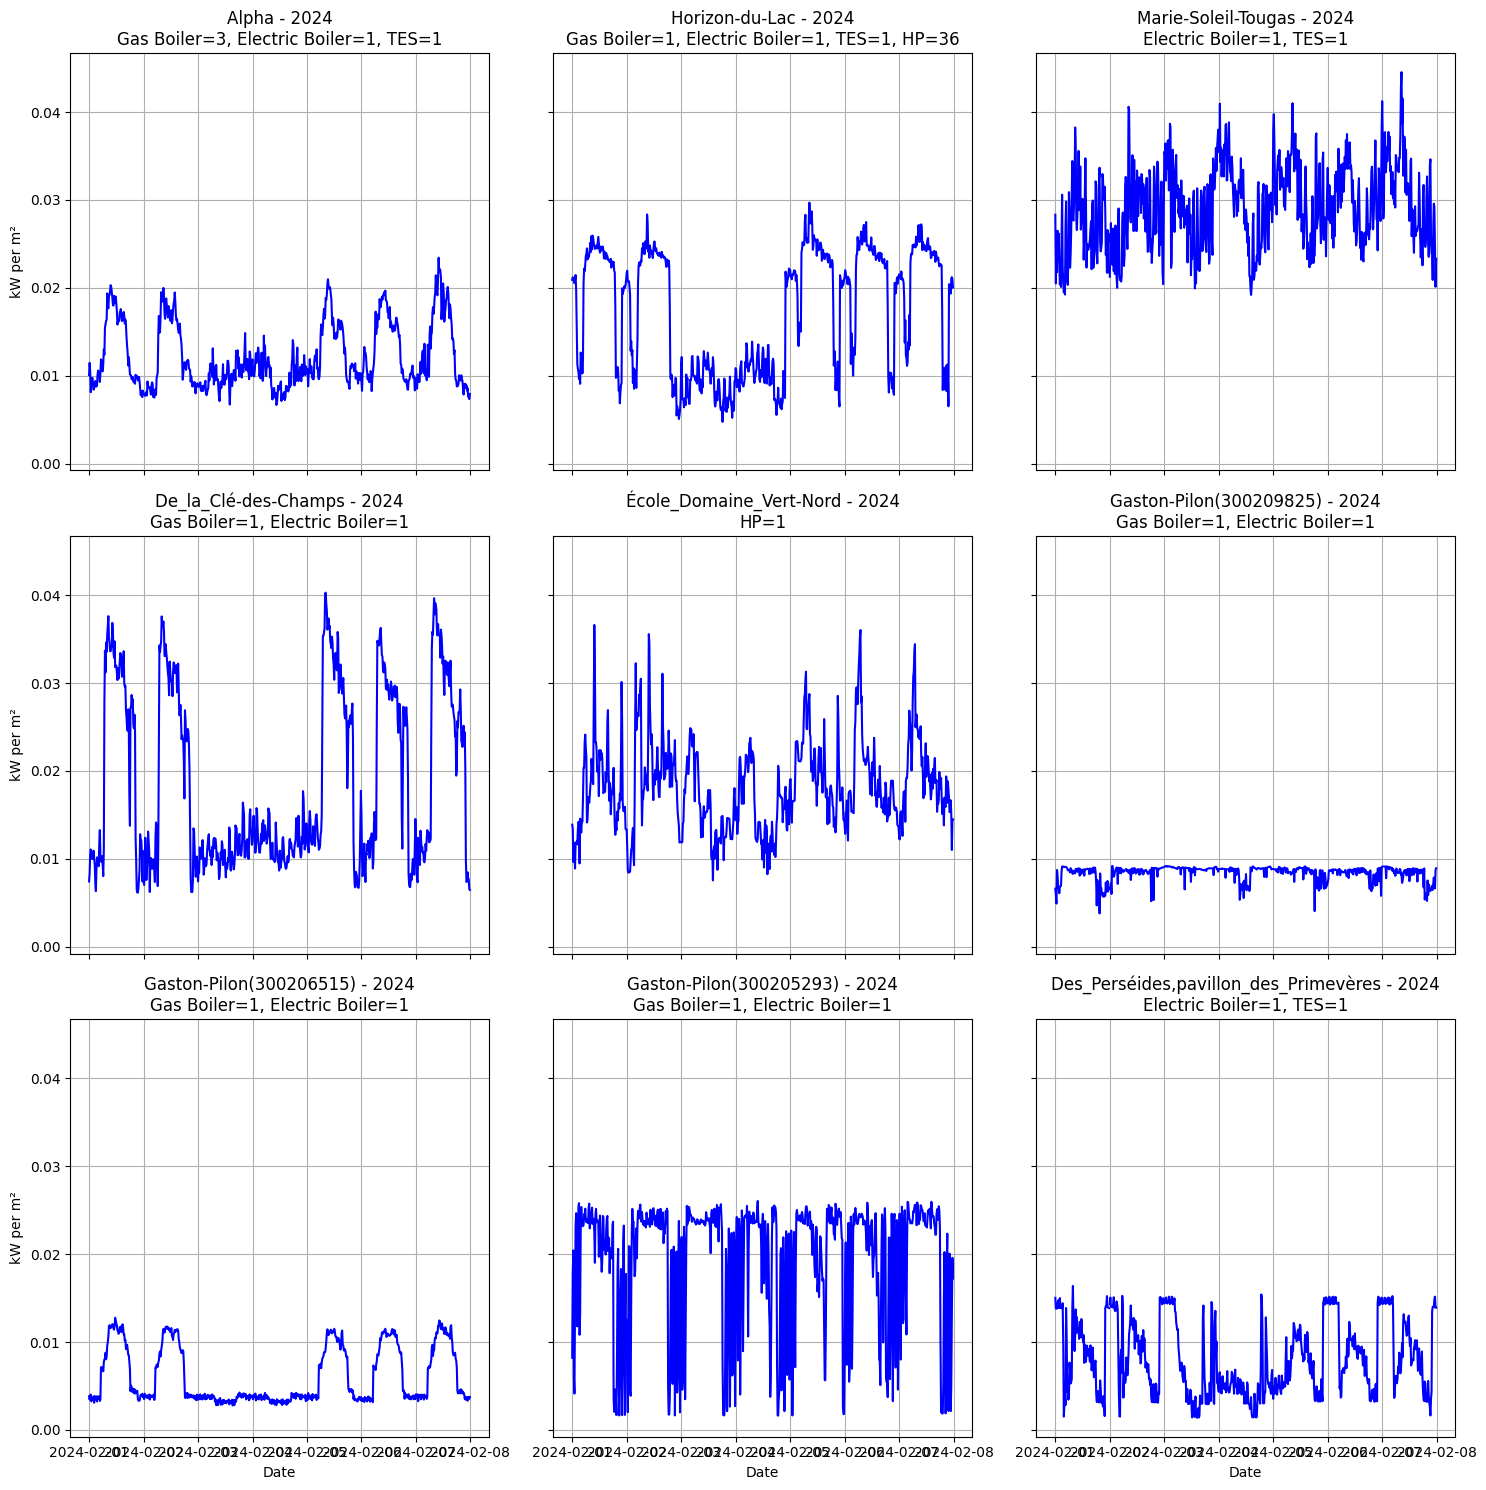

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Floor areas for each school
floorAreas = {
    "Alpha": 7742,
    "Curé-Paquin": 4579,
    "Des_Perséides,pavillon_des_Primevères": 3108,
    "Gaston-Pilon(300209825)": 5103,
    "Gaston-Pilon(300206515)": 5103,
    "Gaston-Pilon(300205293)": 5103,
    "De_la_Clé-des-Champs": 2999,
    "Horizon-du-Lac": 4977,
    "Marie-Soleil-Tougas": 5478,
    "École_Domaine_Vert-Nord": 5717
}

# Mechanical equipment details for each school
equipment = {
    "Alpha": {"Gas Boiler": 3, "Electric Boiler": 1, "TES": 1, "HP": 0},
    "Curé-Paquin": {"Gas Boiler": 0, "Electric Boiler": 1, "TES": 1, "HP": 0, "Radiant Heating": 1, "PV Panel": 1},
    "Des_Perséides,pavillon_des_Primevères": {"Gas Boiler": 0, "Electric Boiler": 1, "TES": 1, "HP": 0},
    "Gaston-Pilon(300209825)": {"Gas Boiler": 1, "Electric Boiler": 1, "TES": 0, "HP": 0},
    "Gaston-Pilon(300206515)": {"Gas Boiler": 1, "Electric Boiler": 1, "TES": 0, "HP": 0},
    "Gaston-Pilon(300205293)": {"Gas Boiler": 1, "Electric Boiler": 1, "TES": 0, "HP": 0},
    "De_la_Clé-des-Champs": {"Gas Boiler": 1, "Electric Boiler": 1, "TES": 0, "HP": 0},
    "Horizon-du-Lac": {"Gas Boiler": 1, "Electric Boiler": 1, "TES": 1, "HP": 36},
    "Marie-Soleil-Tougas": {"Gas Boiler": 0, "Electric Boiler": 1, "TES": 1, "HP": 0},
    "École_Domaine_Vert-Nord": {"Gas Boiler": 0, "Electric Boiler": 0, "TES": 0, "HP": 1}
}

# List of paths for different schools
schoolPaths = [
    "/content/drive/MyDrive/🍁 /UdS/Thesis/Projects/Alpha",
    "/content/drive/MyDrive/🍁 /UdS/Thesis/Projects/Horizon-du-Lac",
    "/content/drive/MyDrive/🍁 /UdS/Thesis/Projects/Marie-Soleil-Tougas",
    "/content/drive/MyDrive/🍁 /UdS/Thesis/Projects/De_la_Clé-des-Champs",
    "/content/drive/MyDrive/🍁 /UdS/Thesis/Projects/École_Domaine_Vert-Nord",
    "/content/drive/MyDrive/🍁 /UdS/Thesis/Projects/Gaston-Pilon(300209825)",
    "/content/drive/MyDrive/🍁 /UdS/Thesis/Projects/Gaston-Pilon(300206515)",
    "/content/drive/MyDrive/🍁 /UdS/Thesis/Projects/Gaston-Pilon(300205293)",
    "/content/drive/MyDrive/🍁 /UdS/Thesis/Projects/Des_Perséides,pavillon_des_Primevères",
]

def filter_february_first_week(df, year):
    start_date = pd.to_datetime(f'{year}-02-01')
    end_date = pd.to_datetime(f'{year}-02-08')
    df_filtered = df[(df.iloc[:, 1] >= start_date) & (df.iloc[:, 1] < end_date)]
    return df_filtered

def plot_data_for_year(year):
    num_schools = len(schoolPaths)

    # Determine grid size
    grid_size = int(np.ceil(np.sqrt(num_schools)))

    fig, axs = plt.subplots(grid_size, grid_size, figsize=(15, 15), sharex=True, sharey=True)
    axs = axs.flatten()  # Flatten the array for easier iteration

    for i, schoolPath in enumerate(schoolPaths):
        school_name = os.path.basename(schoolPath).split('/')[-1]

        # Get floor area for normalization
        floor_area = floorAreas.get(school_name, None)
        if floor_area is None:
            print(f"No floor area found for {school_name}. Skipping normalization.")
            continue

        # Get equipment information
        equip_info = equipment.get(school_name, {})
        equip_summary = ', '.join([f"{k}={v}" for k, v in equip_info.items() if v > 0])

        csv_files = [f for f in os.listdir(schoolPath) if f.endswith('.csv')]

        if not csv_files:
            print(f"No CSV files found in {schoolPath}")
            axs[i].set_title(f'{school_name} - {year}\n{equip_summary}')
            continue

        for file in csv_files:
            full_path = os.path.join(schoolPath, file)

            try:
                df = pd.read_csv(full_path, delimiter=';', decimal=',')
                df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1], errors='coerce')
                df = df.dropna(subset=[df.columns[1]])

                if df.shape[1] >= 3:
                    df.iloc[:, 2] = pd.to_numeric(df.iloc[:, 2], errors='coerce')
                    df = df.dropna(subset=[df.columns[2]])

                    df_filtered = filter_february_first_week(df, year)

                    if not df_filtered.empty:
                        # Normalize by floor area
                        normalized_values = df_filtered.iloc[:, 2] / floor_area
                        axs[i].plot(df_filtered.iloc[:, 1], normalized_values, color='blue')

            except Exception as e:
                print(f"Error processing file {file} in {schoolPath}: {e}")

        # Set titles for each subplot with equipment information
        axs[i].set_title(f'{school_name} - {year}\n{equip_summary}')
        axs[i].set_ylabel('kW per m²')

    # Hide unused subplots
    for j in range(num_schools, len(axs)):
        fig.delaxes(axs[j])

    # Set labels and grid for all subplots
    for ax in axs:
        ax.set_xlabel('Date')
        ax.grid(True)
        ax.label_outer()

    plt.tight_layout()
    plt.show()

# Plot data for 2023
plot_data_for_year(2023)

# Plot data for 2024
plot_data_for_year(2024)


# New Section